In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [483]:
# read data
churn = pd.read_csv("/Users/absinha/Downloads/telecom-churn-case-study-hackathon-cc50/train.csv")

In [484]:
churn.shape

(69999, 172)

In [485]:
# look at initial rows of the data
churn.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [486]:
# feature type summary
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

There are 99999 rows and 226 columns in the data. Lot of the columns are numeric type, but we need to inspect which are the categorical columns.

In [487]:
# look at data statistics
churn.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

import sweetviz as sv
sweet_report = sv.analyze(churn,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

In [488]:
# create backup of data
original = churn.copy()

In [489]:
# create column name list by types of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


# Handling missing values

In [490]:
# look at missing value ratio in each column
churn.isnull().sum()*100/churn.shape[0]

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

# impute missing values

## i) Imputing with zeroes

In [491]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [492]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [493]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [494]:
# impute missing values with 0
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [495]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(churn[zero_impute].isnull().sum()*100/churn.shape[1])

# summary
print("\n\nSummary statistics\n")
print(churn[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.0000

In [496]:
# drop id and date columns
print("Shape before dropping: ", churn.shape)
churn = churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 161)


## ii) Replace NaN values in categorical variables

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [497]:
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [498]:
# replace missing values with '-1' in categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [499]:
# missing value ratio
print("Missing value ratio:\n")
print(churn[cat_cols].isnull().sum()*100/churn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


## iii) Drop variables with more than a given threshold of missing values

In [500]:
initial_cols = churn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [501]:
# drop columns
churn = churn.loc[:, include_cols]

dropped_cols = initial_cols  - churn.shape[1]
print("{0} columns dropped.".format(dropped_cols))

12 columns dropped.


## iv) imputing using MICE

install fancyimpute package using [this](https://github.com/iskandr/fancyimpute) link and following the install instructions

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

churn_imputed = scaler.fit_transform(churn)

In [502]:
from sklearn.impute import SimpleImputer

In [503]:
# Get the list of columns
churn_cols = churn.columns

# Create a SimpleImputer object
imputer = SimpleImputer(strategy='mean')

# Impute the missing values
churn_imputed = imputer.fit_transform(churn)

# Convert the imputed values to a DataFrame
churn_imputed = pd.DataFrame(churn_imputed, columns=churn_cols)

In [504]:
# convert imputed numpy array to pandas dataframe
churn = pd.DataFrame(churn_imputed, columns=churn_cols)
print(churn.isnull().sum()*100/churn.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

# filter high-value customers

### calculate total data recharge amount

In [505]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

### add total data recharge and total recharge to get total combined recharge amount for a month

In [506]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [507]:
# calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [508]:
# look at the 70th percentile recharge amount
print("Recharge amount at 75th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.75)))

Recharge amount at 75th percentile: 553.0


In [509]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.75), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(17521, 154)

In [510]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(17521, 149)

We're left with 17521 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 75th percentile customer.

# derive churn

In [511]:
# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_8'] = churn_filtered.total_ic_mou_8 + churn_filtered.total_og_mou_8

In [512]:
# calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_8'] =  churn_filtered.vol_2g_mb_8 + churn_filtered.vol_3g_mb_8

In [513]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_8 == 0 and row.total_internet_mb_8 == 0) else 0, axis=1)

In [514]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_8', 'total_internet_mb_8'], axis=1)

In [515]:
# change data type to category
churn_filtered.churn = churn_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0    94.994578
1     5.005422
Name: churn, dtype: float64


In [516]:
churn_filtered

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn
0,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.00,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.00,0.00,0.00,0.00,17.00,0.00,0.00,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,13.0,10.0,8.0,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,647.0,0.00,0.00,0.00,0.0,0
1,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.00,0.00,0.0,0.00,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.00,0.00,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.00,0.00,0.00,0.08,0.00,0.00,0.10,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.00,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5.0,3.0,4.0,654.0,400.0,652.0,250.0,250.0,250.0,0.0,150.0,250.0,1.0,0.0,1.0,154.0,0.0,154.0,154.0,0.0,154.0,260.42,0.00,354.35,0.00,0.00,0.00,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,602.0,0.00,0.00,0.00,0.0,0
2,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.00,0.00,0.0,0.00,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.00,0.00,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,202.

1. Above details explain that there are few rows for churn as compare to non-churn.
2. Data is imbalanced so need to be very careful before dropping any rows.
3. We will execute smote to make data balanced before performing PCA.

In [517]:
churn_filtered.filter(regex=('date')).columns

Index([], dtype='object')

<Figure size 1500x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Outgoing roaming Usage mon-6 - Box Plot')

<AxesSubplot:>

Text(0.5, 1.0, 'Outgoing roaming Usage mon-7- Box Plot')

<AxesSubplot:>

Text(0.5, 1.0, 'Outgoing roaming Usage mon-8- Box Plot')

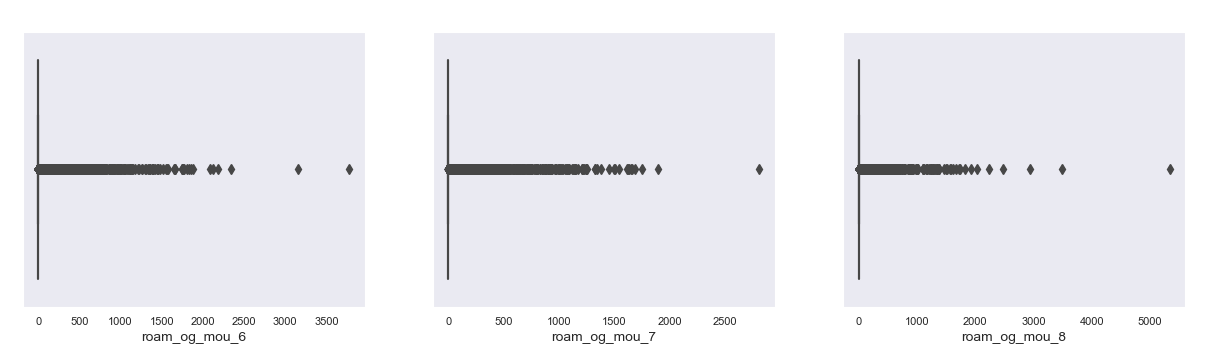

In [518]:
# Lets see distribution of same fields in each month using box plot.
# Quantitative Variables
import seaborn as sns
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(churn_filtered['roam_og_mou_6'])
ax.set_title('Outgoing roaming Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(churn_filtered['roam_og_mou_7'])
ax.set_title('Outgoing roaming Usage mon-7- Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(churn_filtered['roam_og_mou_8'])
ax.set_title('Outgoing roaming Usage mon-8- Box Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of roaming usage shows august month usage has reduced for sure. 
# but it should have been increased if customer is happy.

<Figure size 1500x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'total Outgoing Usage mon-6 - Box Plot')

<AxesSubplot:>

Text(0.5, 1.0, 'total Outgoing Usage mon-7- Box Plot')

<AxesSubplot:>

Text(0.5, 1.0, 'total Outgoing Usage mon-8- Box Plot')

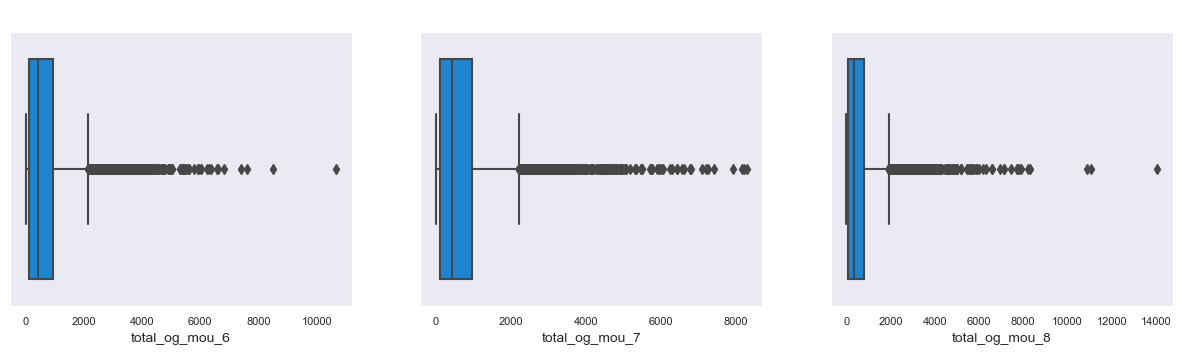

In [519]:
# Lets see distribution of same fields in each motnh using box plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(churn_filtered['total_og_mou_6'])
ax.set_title('total Outgoing Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(churn_filtered['total_og_mou_7'])
ax.set_title('total Outgoing Usage mon-7- Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(churn_filtered['total_og_mou_8'])
ax.set_title('total Outgoing Usage mon-8- Box Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of total outgoing usage shows august month usage has reduced for sure. 
# but it should have been increased or constant if customer is happy but it doesn't look that way.

<Figure size 1500x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'total incomig Usage mon-6 - Box Plot')

<AxesSubplot:>

Text(0.5, 1.0, 'total incoming Usage mon-7- Box Plot')

<AxesSubplot:>

Text(0.5, 1.0, 'total incoming Usage mon-8- Box Plot')

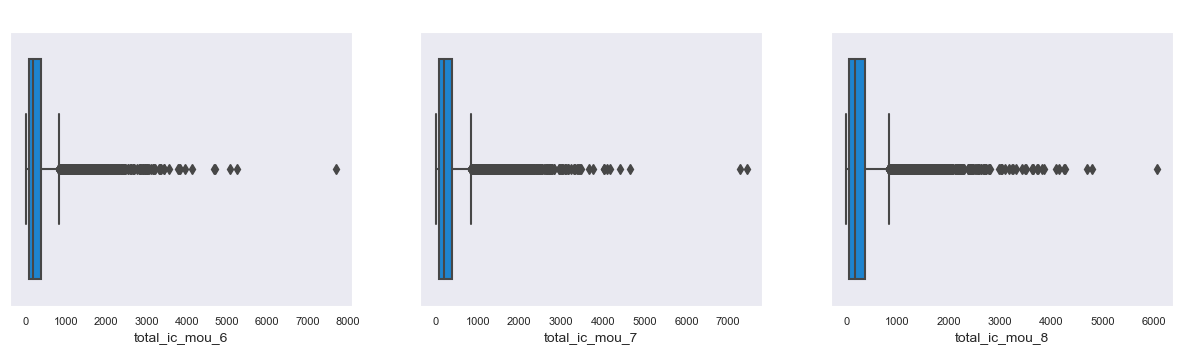

In [520]:
# Lets see distribution of same fields in each motnh using box plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(churn_filtered['total_ic_mou_6'])
ax.set_title('total incomig Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(churn_filtered['total_ic_mou_7'])
ax.set_title('total incoming Usage mon-7- Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(churn_filtered['total_ic_mou_8'])
ax.set_title('total incoming Usage mon-8- Box Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of total incoming usage shows august month usage has got better or constant for sure. 

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Age on Netwrok - Box Plot')

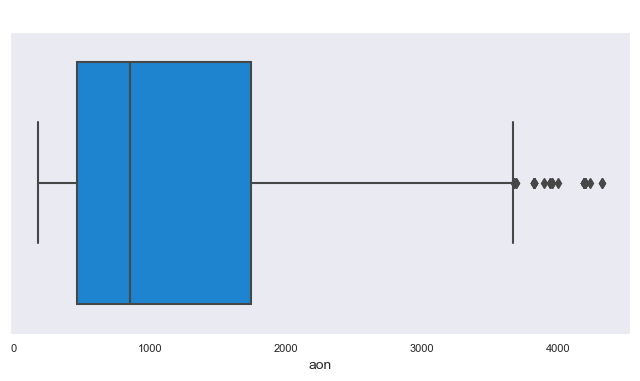

In [521]:
# Lets see distribution of same fields in each motnh using box plot.
# Quantitative Variables

plt.figure(figsize=(8,4),facecolor='w')
sns.set_style("dark")
ax = sns.boxplot(churn_filtered['aon'])
ax.set_title('Age on Netwrok - Box Plot',fontsize=14,color='w')
plt.show()

In [522]:
#lets copy the dataframe to another before we do other activities
churn_filteredcopy = churn_filtered
print(churn_filteredcopy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Columns: 150 entries, loc_og_t2o_mou to churn
dtypes: category(1), float64(149)
memory usage: 19.9 MB
None


In [523]:
#lets remove aon column 
churn_filteredcopy.drop(['aon'], axis=1, inplace=True)

# Calculate difference between 8th and previous months

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [524]:
churn_filteredcopy['arpu_diff'] = churn_filteredcopy.arpu_8 - ((churn_filteredcopy.arpu_6 + churn_filteredcopy.arpu_7)/2)

churn_filteredcopy['onnet_mou_diff'] = churn_filteredcopy.onnet_mou_8 - ((churn_filteredcopy.onnet_mou_6 + churn_filteredcopy.onnet_mou_7)/2)

churn_filteredcopy['offnet_mou_diff'] = churn_filteredcopy.offnet_mou_8 - ((churn_filteredcopy.offnet_mou_6 + churn_filteredcopy.offnet_mou_7)/2)

churn_filteredcopy['roam_ic_mou_diff'] = churn_filteredcopy.roam_ic_mou_8 - ((churn_filteredcopy.roam_ic_mou_6 + churn_filteredcopy.roam_ic_mou_7)/2)

churn_filteredcopy['roam_og_mou_diff'] = churn_filteredcopy.roam_og_mou_8 - ((churn_filteredcopy.roam_og_mou_6 + churn_filteredcopy.roam_og_mou_7)/2)

churn_filteredcopy['loc_og_mou_diff'] = churn_filteredcopy.loc_og_mou_8 - ((churn_filteredcopy.loc_og_mou_6 + churn_filteredcopy.loc_og_mou_7)/2)

churn_filteredcopy['std_og_mou_diff'] = churn_filteredcopy.std_og_mou_8 - ((churn_filteredcopy.std_og_mou_6 + churn_filteredcopy.std_og_mou_7)/2)

churn_filteredcopy['isd_og_mou_diff'] = churn_filteredcopy.isd_og_mou_8 - ((churn_filteredcopy.isd_og_mou_6 + churn_filteredcopy.isd_og_mou_7)/2)

churn_filteredcopy['spl_og_mou_diff'] = churn_filteredcopy.spl_og_mou_8 - ((churn_filteredcopy.spl_og_mou_6 + churn_filteredcopy.spl_og_mou_7)/2)

churn_filteredcopy['total_og_mou_diff'] = churn_filteredcopy.total_og_mou_8 - ((churn_filteredcopy.total_og_mou_6 + churn_filteredcopy.total_og_mou_7)/2)

churn_filteredcopy['loc_ic_mou_diff'] = churn_filteredcopy.loc_ic_mou_8 - ((churn_filteredcopy.loc_ic_mou_6 + churn_filteredcopy.loc_ic_mou_7)/2)

churn_filteredcopy['std_ic_mou_diff'] = churn_filteredcopy.std_ic_mou_8 - ((churn_filteredcopy.std_ic_mou_6 + churn_filteredcopy.std_ic_mou_7)/2)

churn_filteredcopy['isd_ic_mou_diff'] = churn_filteredcopy.isd_ic_mou_8 - ((churn_filteredcopy.isd_ic_mou_6 + churn_filteredcopy.isd_ic_mou_7)/2)

churn_filteredcopy['spl_ic_mou_diff'] = churn_filteredcopy.spl_ic_mou_8 - ((churn_filteredcopy.spl_ic_mou_6 + churn_filteredcopy.spl_ic_mou_7)/2)

churn_filteredcopy['total_ic_mou_diff'] = churn_filteredcopy.total_ic_mou_8 - ((churn_filteredcopy.total_ic_mou_6 + churn_filteredcopy.total_ic_mou_7)/2)

churn_filteredcopy['total_rech_num_diff'] = churn_filteredcopy.total_rech_num_8 - ((churn_filteredcopy.total_rech_num_6 + churn_filteredcopy.total_rech_num_7)/2)

churn_filteredcopy['total_rech_amt_diff'] = churn_filteredcopy.total_rech_amt_8 - ((churn_filteredcopy.total_rech_amt_6 + churn_filteredcopy.total_rech_amt_7)/2)

churn_filteredcopy['max_rech_amt_diff'] = churn_filteredcopy.max_rech_amt_8 - ((churn_filteredcopy.max_rech_amt_6 + churn_filteredcopy.max_rech_amt_7)/2)

churn_filteredcopy['total_rech_data_diff'] = churn_filteredcopy.total_rech_data_8 - ((churn_filteredcopy.total_rech_data_6 + churn_filteredcopy.total_rech_data_7)/2)

churn_filteredcopy['max_rech_data_diff'] = churn_filteredcopy.max_rech_data_8 - ((churn_filteredcopy.max_rech_data_6 + churn_filteredcopy.max_rech_data_7)/2)

churn_filteredcopy['av_rech_amt_data_diff'] = churn_filteredcopy.av_rech_amt_data_8 - ((churn_filteredcopy.av_rech_amt_data_6 + churn_filteredcopy.av_rech_amt_data_7)/2)

churn_filteredcopy['vol_2g_mb_diff'] = churn_filteredcopy.vol_2g_mb_8 - ((churn_filteredcopy.vol_2g_mb_6 + churn_filteredcopy.vol_2g_mb_7)/2)

churn_filteredcopy['vol_3g_mb_diff'] = churn_filteredcopy.vol_3g_mb_8 - ((churn_filteredcopy.vol_3g_mb_6 + churn_filteredcopy.vol_3g_mb_7)/2)


In [525]:
# let's look at summary of one of the difference variables
churn_filteredcopy['total_og_mou_diff'].describe()

count    17521.000000
mean       -78.128517
std        524.061637
min      -7213.410000
25%       -179.040000
50%        -15.050000
75%         67.215000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

## delete columns that belong to the churn month (8th month)

In [526]:
# delete all variables relating to 8th month
churn_filteredcopy = churn_filteredcopy.filter(regex='[^8]$', axis=1)
churn_filteredcopy.shape

(17521, 125)

In [527]:
# extract all names that end with 8
col_8_names = churn.filter(regex='8$', axis=1).columns

#update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_8_names]
cat_cols.append('churn')
num_cols = [col for col in churn_filteredcopy.columns if col not in cat_cols]

In [528]:
churn_filteredcopy[cat_cols].shape

(17521, 5)

## visualise data

In [529]:
churn_filteredcopy[cat_cols].apply(lambda column: column.astype("category"), axis=0)

,night_pck_user_6,night_pck_user_7,fb_user_6,fb_user_7,churn
0,0.0,0.0,1.0,1.0,0
1,0.0,-1.0,1.0,-1.0,0
2,-1.0,-1.0,-1.0,-1.0,0
3,0.0,0.0,1.0,1.0,0
4,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...
17516,-1.0,0.0,-1.0,1.0,0
17517,0.0,-1.0,1.0,-1.0,0
17518,1.0,0.0,1.0,1.0,0
17519,0.0,0.0,1.0,1.0,0


In [530]:
# change columns types
churn_filteredcopy[num_cols] = churn_filteredcopy[num_cols].apply(pd.to_numeric)
churn_filteredcopy[cat_cols] = churn_filteredcopy[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [531]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

def univariate(variable, stats=True):

    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())

    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())

    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):
        sns.boxplot(var1, var2)

## Univariate EDA

count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


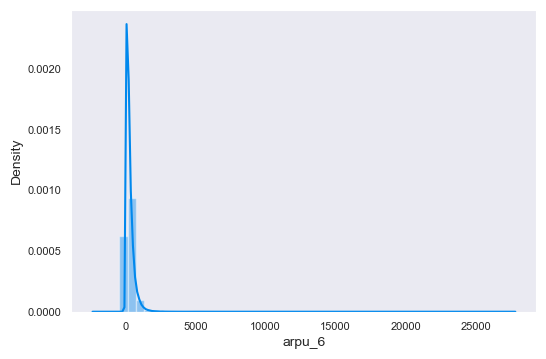

In [532]:
univariate(churn.arpu_6)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


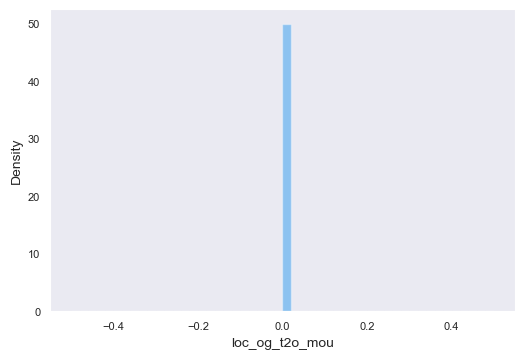

In [533]:
univariate(churn.loc_og_t2o_mou)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


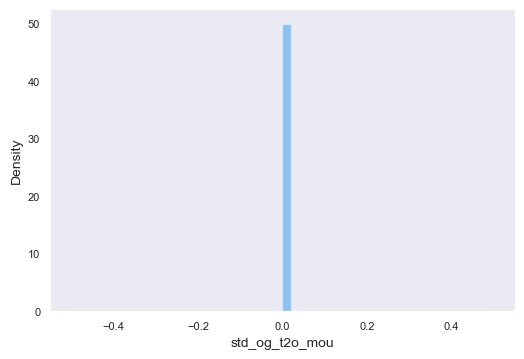

In [534]:
univariate(churn.std_og_t2o_mou)

count    69999.000000
mean       132.978257
std        303.534603
min          0.000000
25%          7.360000
50%         36.790000
75%        132.978257
max      10752.560000
Name: onnet_mou_8, dtype: float64


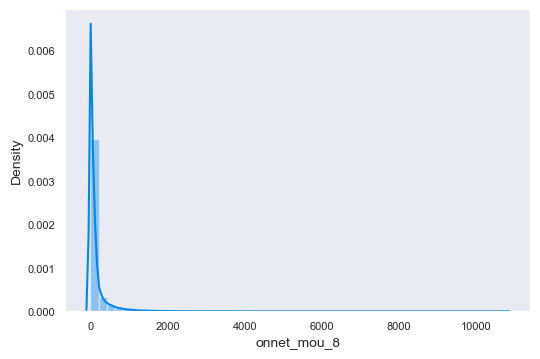

In [535]:
univariate(churn.onnet_mou_8)

count    69999.000000
mean       196.543577
std        315.400354
min          0.000000
25%         34.390000
50%        101.680000
75%        216.410000
max      14007.340000
Name: offnet_mou_8, dtype: float64


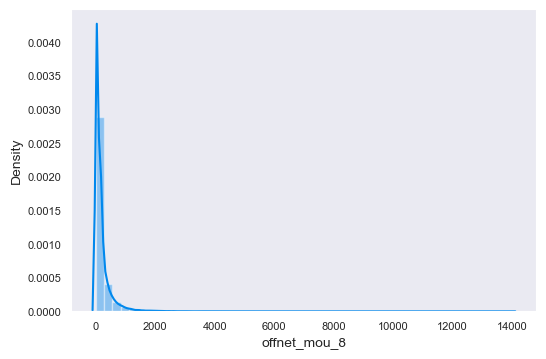

In [536]:
univariate(churn.offnet_mou_8)

Variables are very **skewed** towards the left.

### Cap outliers in all numeric variables with k-sigma technique

In [537]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [538]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [539]:
# cap outliers in the numeric columns
churn_filteredcopy[num_cols] = churn_filteredcopy[num_cols].apply(cap_outliers, axis=0)

# Modelling

## i) Making predictions

In [540]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## Preprocessing data

In [541]:
# change churn to numeric
churn_filteredcopy['churn'] = pd.to_numeric(churn_filteredcopy['churn'])

In [542]:
#lets import train test split 
from sklearn.model_selection import train_test_split
X = churn_filteredcopy.drop(['churn'], axis=1)
y = churn_filteredcopy['churn']    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

#### Perform MinMax scaler before performing PCA

In [543]:
#perform minmax scaling before PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [544]:
# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

### Handling class imbalance using smote

In [545]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 619
counts of label '0': 11645


In [546]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smo, y_train_smo = sm.fit_resample(X_train, y_train)

In [547]:
#lets print stats after smote
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 11645
counts of label '0': 11645


### Train Test split

# divide data into train and test
X = churn_filteredcopy.drop("churn", axis = 1)
y = churn_filteredcopy.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

## Aggregating the categorical columns

In [553]:
X_train_smo.shape

(23290, 124)

In [554]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smo, y_train_smo = sm.fit_resample(X_train, y_train)

In [555]:
#lets fit PCA on the train dataset
pca.fit(X_train_smo)

PCA()

In [556]:
pca.explained_variance_ratio_[:50]

array([0.22456364, 0.09862797, 0.06913958, 0.06238648, 0.05514509,
       0.045946  , 0.03766603, 0.02936077, 0.02605631, 0.02353867,
       0.02160759, 0.01617826, 0.01418793, 0.01329705, 0.01262329,
       0.01156647, 0.01113764, 0.01008062, 0.01001935, 0.00975952,
       0.00926117, 0.00887338, 0.00872489, 0.00799837, 0.00739135,
       0.00701713, 0.00695275, 0.00646355, 0.00572964, 0.00563707,
       0.00535479, 0.00493916, 0.00465942, 0.00457618, 0.00442776,
       0.00428025, 0.00415685, 0.00369118, 0.0035065 , 0.00338707,
       0.00330892, 0.00323816, 0.00307938, 0.00301436, 0.00295159,
       0.00288907, 0.00274655, 0.00260567, 0.002383  , 0.00224151])

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

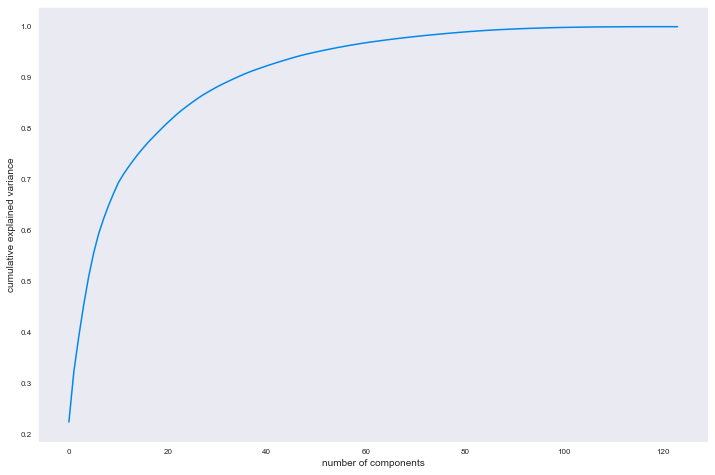

In [557]:
#lets draw screeplot in between cumulative variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Plot shows that 60 components are enough to explain close to 95% variance

In [558]:
#lets perform incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=60)

In [559]:
#fit
X_train_pca = pca_again.fit_transform(X_train_smo)
X_train_pca.shape

(23290, 60)

In [560]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
#correlations are close to 0

max corr: 0.009863271432829772 , min corr:  -0.008945468025517983


In [567]:
#Applying selected components to the test data - 35 components
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(5257, 60)

### Modeling : Logistic Regression 

In [568]:
#import library and fit train model on train data
#class_weight="balanced":it basically means replicating the smaller class until you have as many samples as in the larger one, 
#but in an implicit way.Though we have already used smote but here we can use this too.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca2 = LogisticRegression(class_weight='balanced')
learner_pca2.fit(X_train_pca,y_train_smo)

LogisticRegression(class_weight='balanced')

In [569]:
#Predict on training set
dtrain_predictions = learner_pca2.predict(X_train_pca)
dtrain_predprob = learner_pca2.predict_proba(X_train_pca)[:,1]

In [570]:
#lets print some scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, dtrain_predprob))

Accuracy : 0.9678832116788322
Recall/Sensitivity : 0.9848003434950623
AUC Score (Train): 0.9915242187801022


In [571]:
#lets predict on test dataset.
#print all scores
pred_probs_test = learner_pca2.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.9611914630988213
precision score: 0.5175983436853002
Sensitivity/Recall : 0.9689922480620154
Specificity: 0.9533906781356272
False Positive Rate: 0.046609321864372874
Positive predictive value: 0.5175983436853002
Negative Predictive value: 0.9983242563887725
Accuracy : 0.9541563629446452


In [572]:
#lets check with probability cutoff 0.5
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.000012,0
1,0,0.000012,0
2,0,0.095795,0
3,0,0.004435,0
4,0,0.000090,0


In [573]:
#lets define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [574]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

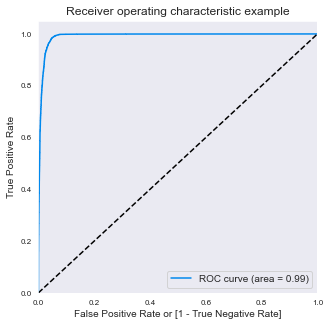

In [575]:
#lets draw roc curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [576]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000012,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.095795,0,1,0,0,0,0,0,0,0,0,0
3,0,0.004435,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000090,0,1,0,0,0,0,0,0,0,0,0


In [577]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.944311  0.998970  0.889652
0.2   0.2  0.956548  0.998626  0.914470
0.3   0.3  0.963847  0.995706  0.931988
0.4   0.4  0.967239  0.991670  0.942808
0.5   0.5  0.967883  0.984800  0.950966
0.6   0.6  0.965135  0.972263  0.958008
0.7   0.7  0.960412  0.953886  0.966939
0.8   0.8  0.948819  0.921597  0.976041
0.9   0.9  0.910391  0.836754  0.984027


<AxesSubplot:xlabel='prob'>

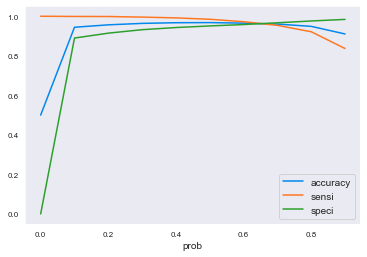

In [578]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.60 is the optimum point to take it as a cutoff probability.

In [579]:
#apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.60 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000012,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.095795,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.004435,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000090,0,1,0,0,0,0,0,0,0,0,0,0


In [580]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.60 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.000012,0
1,0,0.000012,0
2,0,0.095795,0
3,0,0.004435,0
4,0,0.000090,0


In [581]:
#lets find out all scores of train dataset
#print all scores
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.9651352511807643
precision score: 0.9585979171958344
Sensitivity/Recall : 0.9722627737226277
Specificity: 0.9580077286389008
False Positive Rate: 0.04199227136109918
Positive predictive value: 0.9585979171958344
Negative Predictive value: 0.9718616604233818


In [582]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = learner_pca2.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.60 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
2843,0,4.241444e-07,0
14847,0,3.089907e-05,0
3195,0,1.111507e-09,0
10293,0,2.319035e-08,0
5446,1,9.953514e-01,1


In [583]:
#lets find out all scores of test dataset
#print all scores
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.9568402052503524
precision score : 0.5528089887640449
Sensitivity/Recall : 0.9534883720930233
Specificity: 0.9601920384076815
False Positive Rate: 0.03980796159231846
Positive predictive value: 0.5528089887640449
Negative Predictive value: 0.9975062344139651


In [548]:
train = pd.concat([X_train_smo, y_train_smo], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
# train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
# train.groupby('fb_user_8').churn.mean()

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082}
          }
X_train_smo.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [ ]:
# check data type of categorical columns - make sure they are numeric
X_train_smo[[col for col in cat_cols if col not in ['churn']]].info()

## PCA

In [471]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [472]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [473]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       12.19
1       21.17
2       26.89
3       31.97
4       35.77
5       39.45
6       42.43
7       45.30
8       47.62
9       49.85
10      51.99
11      53.98
12      55.93
13      57.72
14      59.46
15      61.00
16      62.53
17      63.96
18      65.35
19      66.68
20      67.89
21      69.07
22      70.22
23      71.32
24      72.40
25      73.42
26      74.40
27      75.34
28      76.27
29      77.14
30      78.00
31      78.83
32      79.65
33      80.45
34      81.24
35      81.98
36      82.69
37      83.38
38      84.06
39      84.72
40      85.37
41      86.01
42      86.63
43      87.23
44      87.80
45      88.31
46      88.81
47      89.28
48      89.75
49      90.21
50      90.65
51      91.08
52      91.49
53      91.89
54      92.27
55      92.64
56      93.00
57      93.36
58      93.71
59      94.06
60      94.37
61      94.67
62      94.96
63      95.24
64      95.52
65      95.79
66      96.03
67      96.25
68      96.47
69      96.69
70      96.89
71    

~ 74 components explain 90% variance

~ 60 components explain 95% variance

<Figure size 875x500 with 0 Axes>

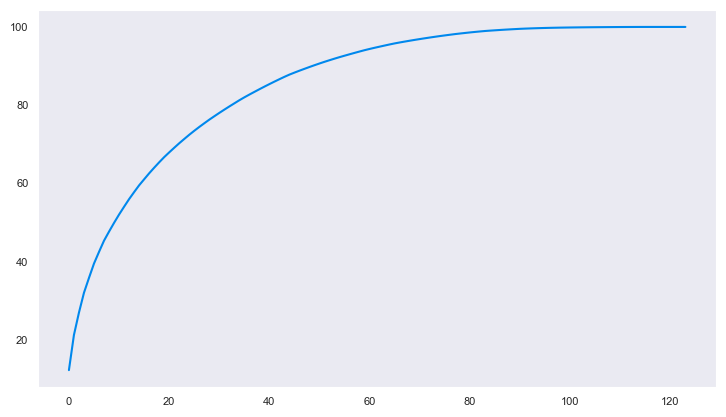

In [474]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## PCA and Logistic Regression

In [475]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [476]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.9429223744292238

### Evaluate on test data

In [477]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3919  243]
 [   3  216]]
Sensitivity: 	0.99
Specificity: 	0.94
AUC:    	 0.99


### Hyperparameter tuning - PCA and Logistic Regression

In [478]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.949924
1    0.050076
Name: churn, dtype: float64

In [293]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()),
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [294]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [295]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.769681,0.053636,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,1.053983,0.083078,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,1.044591,0.044190,0.039809,0.002863,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.987429,0.987543,0.984728,0.984632,0.985481,0.985963,0.001278,16
3,1.432920,0.086315,0.049775,0.007348,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.987664,0.987601,0.984786,0.985466,0.986216,0.986347,0.001143,15
4,0.861070,0.088634,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,1.019869,0.026940,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,1.142360,0.079805,0.046059,0.003327,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.988355,0.987533,0.985400,0.986063,0.985894,0.986649,0.001110,9
7,1.476853,0.052432,0.047890,0.005503,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.988321,0.987379,0.984977,0.986653,0.986543,0.986775,0.001100,1
8,0.725393,0.055645,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,1.036253,0.046422,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [296]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9867745991273843
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [297]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4765  209]
 [  19  261]]
Sensitivity: 	0.93
Specificity: 	0.96
AUC:    	 0.99


In [298]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [299]:
# read data
churn_test = pd.read_csv("/Users/absinha/Downloads/telecom-churn-case-study-hackathon-cc50/test.csv")

### Random Forest

In [152]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [153]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [300]:
model.churn_test

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.00,0.00,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.00,0.00,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.00,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/201

In [154]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9284842184670762
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [155]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6776  115]
 [ 299  311]]
Sensitivity: 	0.51
Specificity: 	0.98
AUC:    	 0.93


Poor sensitivity. The best model is PCA along with Logistic regression.

## ii) Choosing best features

In [156]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [157]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   10.3s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [158]:
# OOB score
rf_model.oob_score_

0.9430666666666667

In [159]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[[6799   92]
 [ 326  284]]
Sensitivity: 	0.47
Specificity: 	0.99
ROC:    	 0.93


### Feature Importance

In [160]:
# predictors
features = churn_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,6.526987
1,roam_og_mou_8,5.027694
2,total_og_mou_8,3.752686
3,roam_ic_mou_8,3.320865
4,arpu_8,2.996393
5,total_rech_amt_diff,2.813091
6,arpu_diff,2.780812
7,last_day_rch_amt_8,2.736845
8,max_rech_amt_8,2.709272
9,loc_ic_t2m_mou_8,2.598117


### Extracting top 30 features

In [161]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

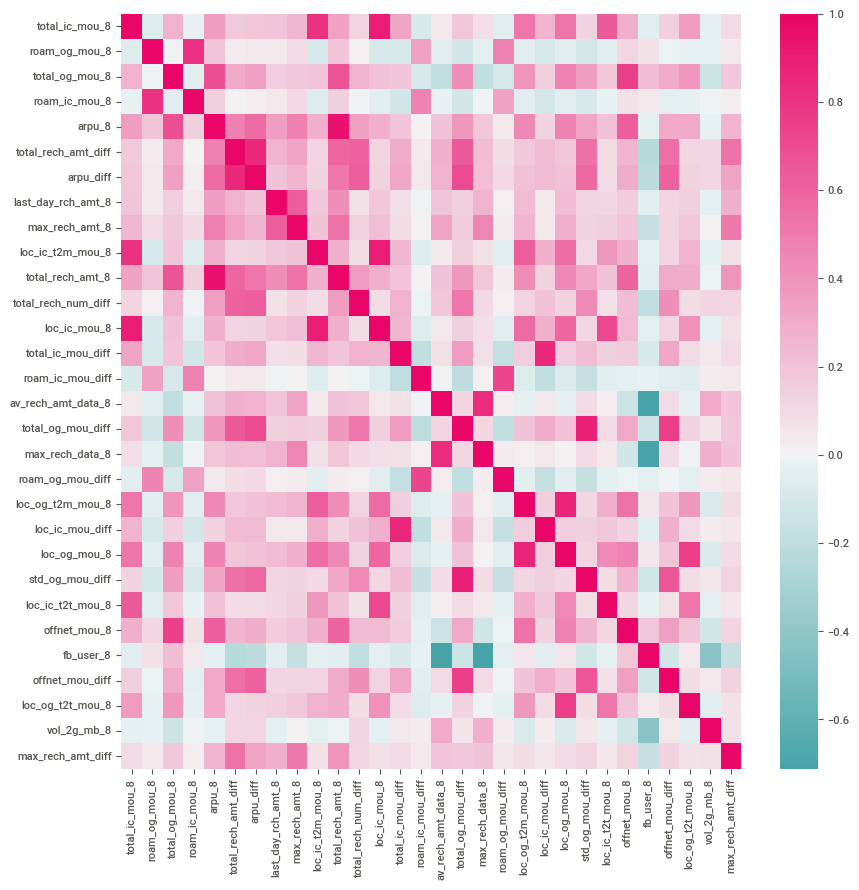

In [162]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [163]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8',
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [164]:
# logistic regression
steps = [('scaler', StandardScaler()),
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [165]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [166]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8825870171450745
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [167]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5780 1111]
 [ 125  485]]
Sensitivity: 	0.8
Specificity: 	0.84
ROC:    	 0.89


### Extract the intercept and the coefficients from the logistic model

In [168]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [169]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [170]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [171]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.597897,-0.865688,-0.699139,-2.406123,0.326068,-0.021768,0.238346,0.141701,-0.791442,1.732919


In [302]:
# read data
churn_test = pd.read_csv("/Users/absinha/Downloads/telecom-churn-case-study-hackathon-cc50/test.csv")

In [304]:
model.predict(churn_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- arpu_2g_6
- arpu_2g_7
- arpu_2g_8
- arpu_3g_6
- arpu_3g_7
- ...
Feature names seen at fit time, yet now missing:
- arpu_diff
- av_rech_amt_data_diff
- churn_probability
- isd_ic_mou_diff
- isd_og_mou_diff
- ...


## Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.